In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os
import pickle
import numpy as np

dataset = '/content/drive/MyDrive/Projek/cifar-10-batches-py/'

def unpickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

def load_cifar10_data():
    images = []
    labels = []

    for i in range(1, 6):
        batch_file = os.path.join(dataset, f'data_batch_{i}')
        batch_data = unpickle(batch_file)

        images.append(batch_data[b'data'])
        labels.append(batch_data[b'labels'])

    images = np.concatenate(images, axis=0)
    labels = np.concatenate(labels, axis=0)

    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    test_batch = unpickle(os.path.join(dataset, 'test_batch'))
    test_images = test_batch[b'data']
    test_labels = test_batch[b'labels']

    test_images = test_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    return (images, labels), (test_images, test_labels)


In [46]:
(train_images, train_labels), (test_images, test_labels) = load_cifar10_data()

# Normalisasi gambar
train_images, test_images = train_images / 255.0, test_images / 255.0

In [45]:
print(f"Jumlah dataset train_images: {train_images.shape[0]} gambar")
print(f"Jumlah dataset test_images: {test_images.shape[0]} gambar")

Jumlah dataset train_images: 50000 gambar
Jumlah dataset test_images: 10000 gambar


In [47]:
print(f"Jumlah label train_labels: {len(train_labels)}")
print(f"Jumlah label test_labels: {len(test_labels)}")

unique_train_labels = np.unique(train_labels)
unique_test_labels = np.unique(test_labels)

print(f"Label unik pada train_labels: {unique_train_labels}")
print(f"Label unik pada test_labels: {unique_test_labels}")

print(f"Jumlah label unik pada train_labels: {len(unique_train_labels)}")
print(f"Jumlah label unik pada test_labels: {len(unique_test_labels)}")

Jumlah label train_labels: 50000
Jumlah label test_labels: 10000
Label unik pada train_labels: [0 1 2 3 4 5 6 7 8 9]
Label unik pada test_labels: [0 1 2 3 4 5 6 7 8 9]
Jumlah label unik pada train_labels: 10
Jumlah label unik pada test_labels: 10


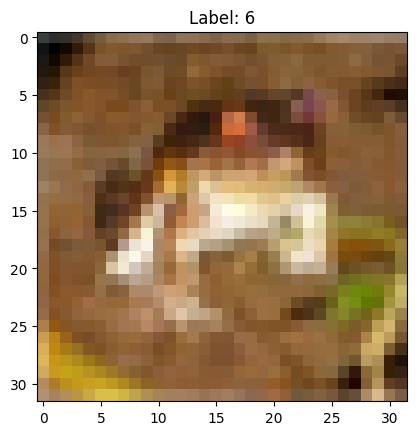

In [48]:
import matplotlib.pyplot as plt

# Cek train images
plt.imshow(train_images[0])
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [49]:
# dimensi data
print(f"Dimensi train_images: {train_images.shape}")
print(f"Dimensi test_images: {test_images.shape}")

Dimensi train_images: (50000, 32, 32, 3)
Dimensi test_images: (10000, 32, 32, 3)


In [50]:
# numpy convert
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# setelah konversi
print(f"Bentuk train_labels: {train_labels.shape}")
print(f"Bentuk test_labels: {test_labels.shape}")

Bentuk train_labels: (50000,)
Bentuk test_labels: (10000,)


In [51]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Meratakan label (opsi)
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

# Kompilasi
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.3475 - loss: 1.7599 - val_accuracy: 0.5062 - val_loss: 1.3942
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5774 - loss: 1.1926 - val_accuracy: 0.6184 - val_loss: 1.0858
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6411 - loss: 1.0112 - val_accuracy: 0.6584 - val_loss: 0.9753
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.6833 - loss: 0.9008 - val_accuracy: 0.6854 - val_loss: 0.9133
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 42ms/step - accuracy: 0.7075 - loss: 0.8240 - val_accuracy: 0.6920 - val_loss: 0.8864
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7336 - loss: 0.7640 - val_accuracy: 0.7083 - val_loss: 0.8503
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7511 - loss: 0.7093 - val_accuracy: 0.6852 - val_loss: 0.9199
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7644

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

313/313 - 5s - 17ms/step - accuracy: 0.7105 - loss: 0.8691

Test accuracy: 0.7105000019073486
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


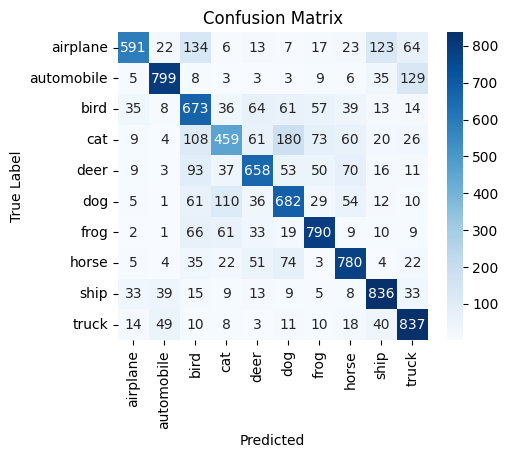

In [55]:
cm = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [56]:
report = classification_report(test_labels, test_predictions, target_names=cifar10_classes)
print(report)

              precision    recall  f1-score   support

    airplane       0.83      0.59      0.69      1000
  automobile       0.86      0.80      0.83      1000
        bird       0.56      0.67      0.61      1000
         cat       0.61      0.46      0.52      1000
        deer       0.70      0.66      0.68      1000
         dog       0.62      0.68      0.65      1000
        frog       0.76      0.79      0.77      1000
       horse       0.73      0.78      0.75      1000
        ship       0.75      0.84      0.79      1000
       truck       0.72      0.84      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [57]:
# save model
model_h = '/content/drive/MyDrive/Projek/cifar10_cnn_model.h5'

model.save(model_h)
print(f"Model berhasil disimpan di {model_h}")

Model berhasil disimpan di /content/drive/MyDrive/Projek/cifar10_cnn_model.h5
